<center><font size=6>Seedling Image Classification</font></center>

### Problem Statement

!['Seedling Image'](seedlings.jpg)

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**


- The data file names are:
    - images.npy
    - Labels.csv
    

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os


# tensorflow imports
import tensorflow as tf
from tensorflow import keras

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# keras imports
from keras import layers, models, optimizers, losses, metrics
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import to_categorical # OHE
from keras.applications.vgg16 import VGG16
from keras import backend

import random
from google.colab.patches import cv2_imshow

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load images per project FAQ
images = np.load('/content/drive/MyDrive/DSML/UnivTex/Project Folder/Project 5: Plant Seedling Classification/images.npy')

# read in labels dataset
labels = pd.read_csv('/content/drive/MyDrive/DSML/UnivTex/Project Folder/Project 5: Plant Seedling Classification/Labels.csv')

## Data Overview

In [ ]:
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

### Understand the shape of the dataset

In [ ]:
# Display the column names
print(labels.columns)

Index(['Label'], dtype='object')


In [ ]:
# print the shape of images and labels
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

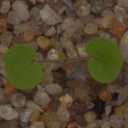

None


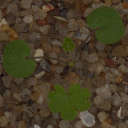

None


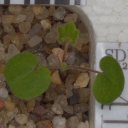

None


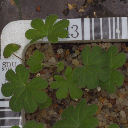

None


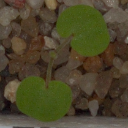

None


In [ ]:
# let's look at the first 5 images
for i in range(5):
  print(cv2_imshow(images[i]))

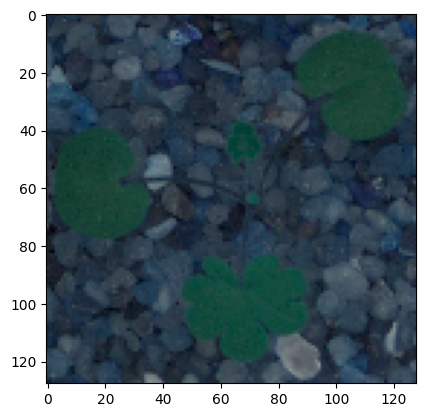

In [ ]:
# let's see what this looks like in matplotlib
# this means it needs to be converted from BGR -> RGB
plt.imshow(images[1])
plt.show()

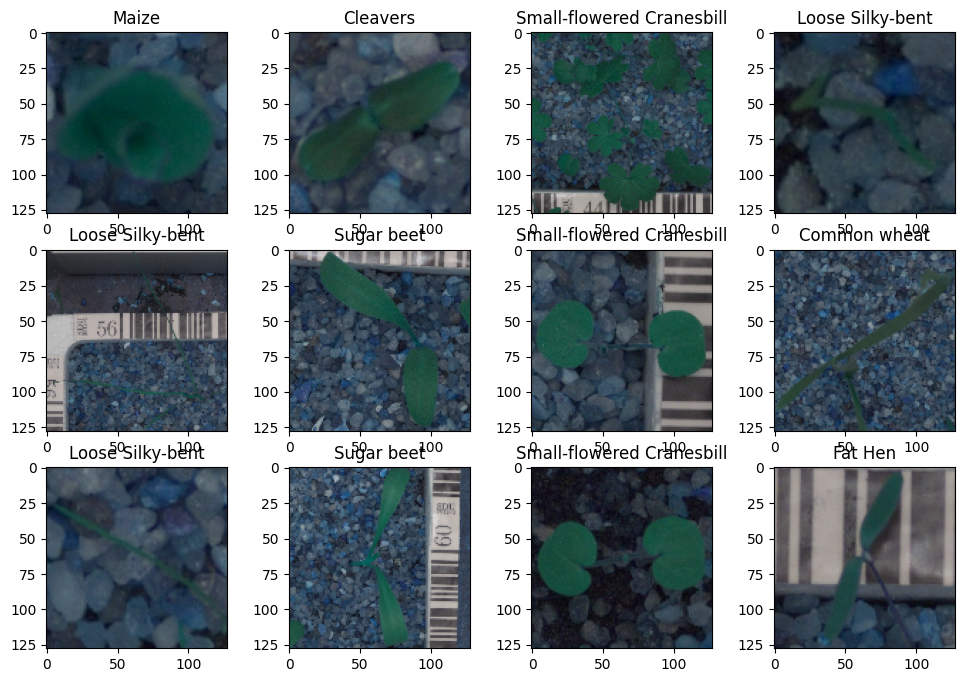

In [ ]:
# let's take a look at a random selection of these with a function
# code taken from the MLS 2 Monkey Species Classification notebook
def plot_images(images, labels): # arguments
  num_classes = 12
  cats = np.unique(labels)
  keys = dict(labels['Label'])
  rows = 3
  cols = 4
  fig = plt.figure(figsize= (12,8))
  for i in range(cols): # loop through columns
    for j in range(rows): # loop throug rows
      random_index = np.random.randint(0, len(labels))
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)
      ax.imshow(images[random_index, :])
      ax.set_title(keys[random_index])
  plt.show()

plot_images(images, labels)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

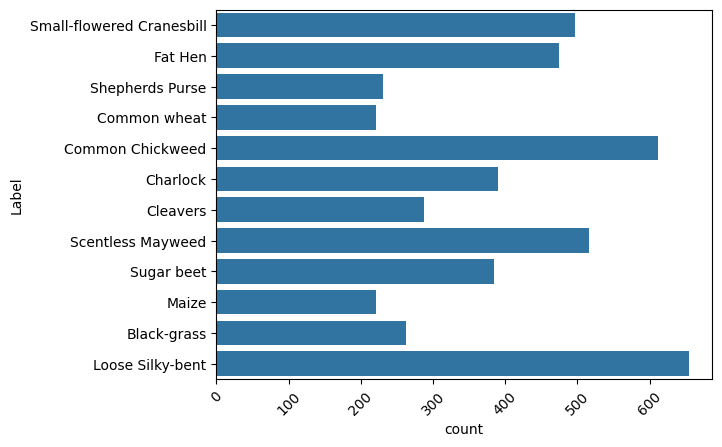

In [ ]:
# what is the balance of each species
# ok, not a balanced dataset
sns.countplot(labels['Label'])
plt.xticks(rotation= 45)

In [ ]:
# total count for each plant
count = labels['Label'].value_counts()
print(count)
print('*'*30)

# percentage count for each plant
count = labels.Label.value_counts(normalize=True)
print(count)

Label
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64
******************************
Label
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: proportion, dtype: float64


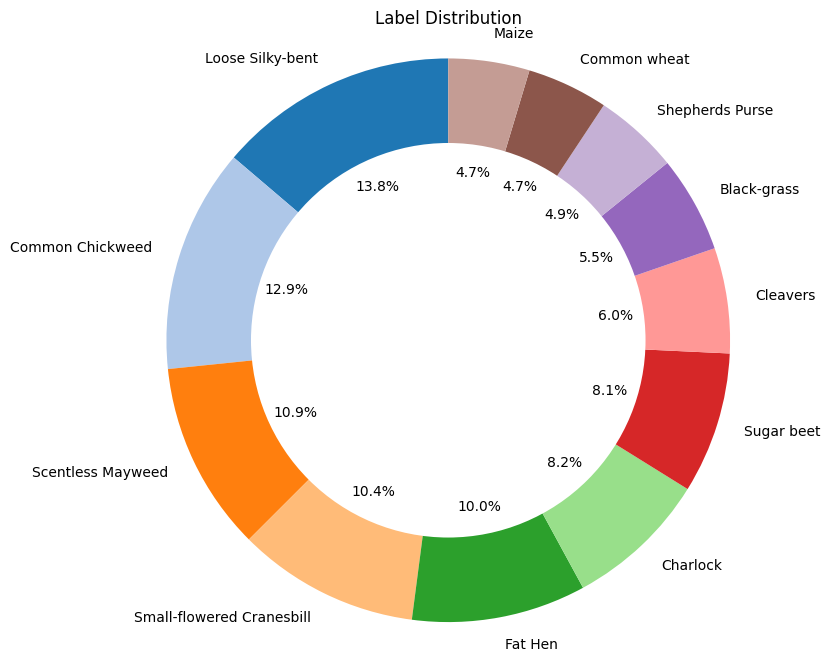

In [ ]:
# got the idea for this code from: https://www.kaggle.com/code/mornstar13/plant-seedling-mobilenet
# but had to modify it to fit my dataset. Super fun to play with different ideas!

# count of images for each label
label_counts = labels['Label'].value_counts()

# sum counts for all labels
total_images = label_counts.sum()

# percentages for each label
label_percentages = (label_counts / total_images) * 100

# plot donut chart for overall label distribution
plt.figure(figsize=(8, 8))
plt.title("Label Distribution")
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Data Pre-Processing

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = [] # create empty list
height = 64 # define height
width = 64 # define width
dimensions = (width, height)
for i in range(len(images)): # loop through the len of the images
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation= cv2.INTER_LINEAR))

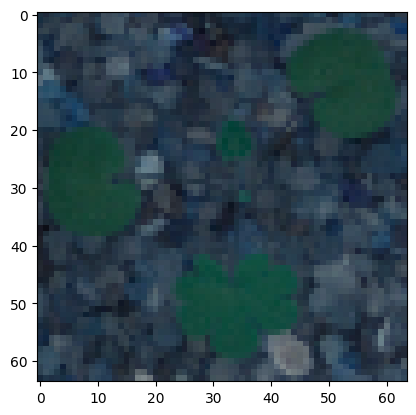

In [ ]:
# show decreased images
plt.imshow(images_decreased[1])

### Convert the BGR images to hsv images and creating a mask to, hopefully, help in image recognition.

In [ ]:
# when researching image pre-processing,
# I found this code and made minor modifications to make it work on my resized data
# source of the original code: GÁBOR VECSEI https://www.kaggle.com/code/gaborvecsei/plant-seedlings-fun-with-computer-vision

# function to create a mask to eliminate the background noise and focus on the plant only
def plant_mask(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])
    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask

def segment_plant(image, mask):
    output = cv2.bitwise_and(image, image, mask=mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp


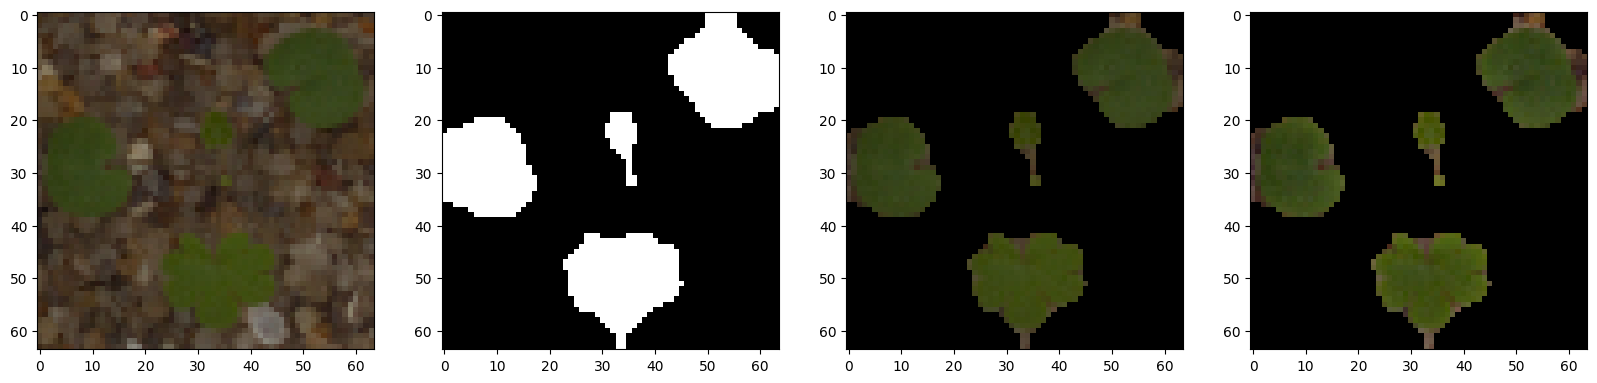

In [ ]:
# visualize the masked images
image_bgr = images_decreased[1]  # Use resized images

image_mask = plant_mask(image_bgr)
image_segmented = segment_plant(image_bgr, image_mask)
image_sharpen = sharpen_image(image_segmented)

# Visualize
fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for visualization
axs[1].imshow(image_mask, cmap='gray')  # Show mask in grayscale
axs[2].imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for visualization
axs[3].imshow(cv2.cvtColor(image_sharpen, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for visualization

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
# split data into train, val, test
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=12,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=12,stratify=y_temp)

In [ ]:
# dataset shapes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3847, 64, 64, 3)
(428, 64, 64, 3)
(475, 64, 64, 3)
(3847, 1)
(428, 1)
(475, 1)


### Encode the target labels

In [ ]:
# I initially tried using to_categorical, but got an error with Charlock, so I used this one instead
lb = LabelBinarizer()
y_train_le = lb.fit_transform(y_train) # fit_transform train data
y_val_le= lb.transform(y_val) # transform validation data
y_test_le= lb.transform(y_test) # transform test data

### Data Normalization

In [ ]:
# normalize the X features
X_train_norm = X_train.astype('float32') / 255.0
X_val_norm = X_val.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

## Model Building

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

### Model 1 Simple baseline

In [ ]:
# initialize sequential model
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (64,64,3)), # convo w/32 3x3 filters
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo w/64 3x3 filters
    layers.MaxPooling2D ((2, 2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo w/64 3x3 filters
    layers.Flatten(), # flatten to go into ANN
    layers.Dense(64, activation= 'relu'), # dense input layer
    layers.Dense(12, activation= 'softmax')
    ])

# compile model
model1.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# print model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
# Fitting the model with 30 epochs and validation_split as 10%
history=model1.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   verbose= 2)

Epoch 1/30
121/121 - 4s - loss: 2.2348 - accuracy: 0.2381 - val_loss: 1.9282 - val_accuracy: 0.3598 - 4s/epoch - 32ms/step
Epoch 2/30
121/121 - 0s - loss: 1.5706 - accuracy: 0.4684 - val_loss: 1.3840 - val_accuracy: 0.5350 - 496ms/epoch - 4ms/step
Epoch 3/30
121/121 - 0s - loss: 1.2089 - accuracy: 0.5940 - val_loss: 1.0435 - val_accuracy: 0.6589 - 488ms/epoch - 4ms/step
Epoch 4/30
121/121 - 0s - loss: 0.9872 - accuracy: 0.6722 - val_loss: 0.9412 - val_accuracy: 0.6752 - 497ms/epoch - 4ms/step
Epoch 5/30
121/121 - 0s - loss: 0.8433 - accuracy: 0.7226 - val_loss: 0.8818 - val_accuracy: 0.7173 - 487ms/epoch - 4ms/step
Epoch 6/30
121/121 - 0s - loss: 0.7125 - accuracy: 0.7718 - val_loss: 0.8352 - val_accuracy: 0.7196 - 499ms/epoch - 4ms/step
Epoch 7/30
121/121 - 0s - loss: 0.6759 - accuracy: 0.7814 - val_loss: 0.7588 - val_accuracy: 0.7547 - 491ms/epoch - 4ms/step
Epoch 8/30
121/121 - 1s - loss: 0.5791 - accuracy: 0.8092 - val_loss: 0.7554 - val_accuracy: 0.7570 - 513ms/epoch - 4ms/step
Ep

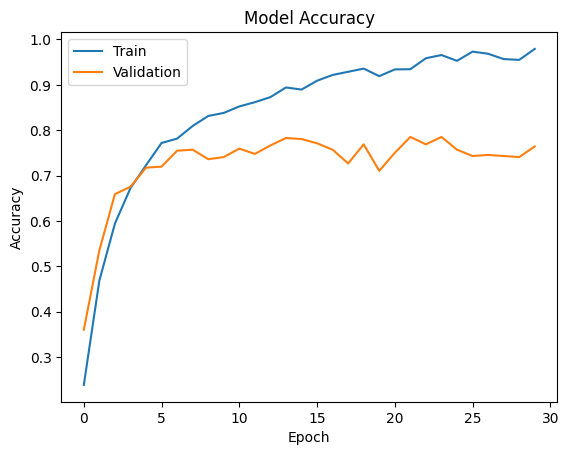

In [ ]:
# model evaluation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Evaluate the model on Test data

In [ ]:
m1_accuracy = model1.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m1_accuracy[1]}")

15/15 - 0s - loss: 1.3768 - accuracy: 0.7684 - 125ms/epoch - 8ms/step
Test Accuracy: 0.7684210538864136


##### Make Predictions

In [ ]:
y_pred = model1.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 2ms/step


#### Confusion Matrix

In [ ]:
plant_classes = ["Loose Silky-bent",
                 "Common Chickweed",
                 "Scentless Mayweed",
                 "Small-flowered Cranesbill",
                 "Fat Hen",
                 "Charlock",
                 "Sugar beet",
                 "Cleavers",
                 "Black-grass",
                 "Shepherds Purse",
                 "Common wheat",
                 "Maize"]

              precision    recall  f1-score   support

           0       0.37      0.27      0.31        26
           1       0.83      0.97      0.89        39
           2       0.95      0.69      0.80        29
           3       0.87      0.89      0.88        61
           4       0.38      0.45      0.42        22
           5       0.80      0.74      0.77        47
           6       0.74      0.82      0.77        65
           7       0.75      0.82      0.78        22
           8       0.84      0.62      0.71        52
           9       0.76      0.83      0.79        23
          10       0.94      0.90      0.92        50
          11       0.68      0.87      0.76        39

    accuracy                           0.77       475
   macro avg       0.74      0.74      0.73       475
weighted avg       0.77      0.77      0.77       475



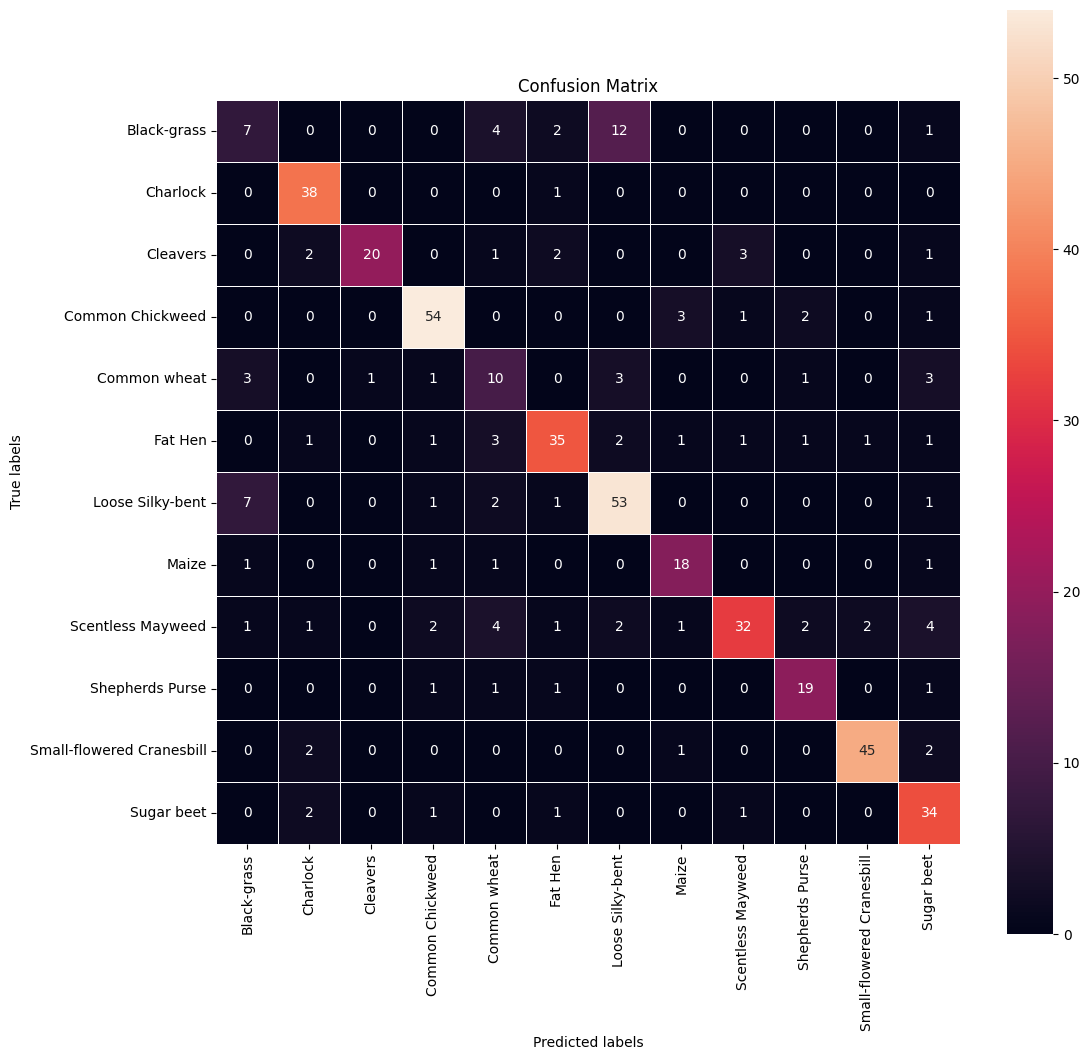

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations:**

Model Accuracy: The simple model had 77% accuracy.

It struggled most predicting predicting Black Grass.

#### Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# prompt: Reducing the Learning Rate:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=5,
                              min_lr=0.0001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip= True,
                                   vertical_flip= True,
                                   rotation_range=40,              # Rotation angle range in degrees
                                   width_shift_range=0.2,          # Shift range along the width
                                   height_shift_range=0.2,         # Shift range along the height
                                   shear_range=0.2,                # Shear intensity range
                                   zoom_range=0.2,                 # Zoom range
                                   fill_mode='nearest',            # Strategy for filling in newly created pixels
                                   brightness_range=[0.5, 1.5],    # Range for adjusting brightness
                                   channel_shift_range=20)

### Model 2 CNN

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

In [ ]:
# initialize sequential model
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation= 'relu', input_shape= (64,64,3)), # convo 1 w/32 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 2 w/64 3x3 filters
    layers.MaxPooling2D((2,2)), # max 1
    layers.BatchNormalization(), # normalization layer 1
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 3 w/32 3x3 filters
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 4 w/32 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 2
    layers.BatchNormalization(), # normalization layer 2
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 5 w/64 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 6 w/64 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 3
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 7 w/16 3x3 filters
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 8 w/16 3x3 filters
    layers.Flatten(), # flatten to go into ANN
    layers.Dense(64, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(32, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(12, activation= 'softmax') # output layer
    ])

In [ ]:
# compile model
model2.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# print model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9

In [ ]:
# fitting the model on 30 epochs
history = model2.fit(
    train_datagen.flow(
        X_train_norm,
        y_train_le,
        batch_size=32,
    ),
    epochs=30,
    validation_data=(X_val_norm, y_val_le),
    callbacks=[reduce_lr],
    verbose=2
)

Epoch 1/30
121/121 - 13s - loss: 2.4604 - accuracy: 0.1256 - val_loss: 3.6415 - val_accuracy: 0.1379 - lr: 0.0010 - 13s/epoch - 103ms/step
Epoch 2/30
121/121 - 6s - loss: 2.4533 - accuracy: 0.1370 - val_loss: 3.8028 - val_accuracy: 0.1379 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 3/30
121/121 - 6s - loss: 2.4269 - accuracy: 0.1347 - val_loss: 11.6182 - val_accuracy: 0.1098 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 4/30
121/121 - 6s - loss: 2.4267 - accuracy: 0.1256 - val_loss: 4.9759 - val_accuracy: 0.1005 - lr: 0.0010 - 6s/epoch - 53ms/step
Epoch 5/30
121/121 - 6s - loss: 2.4258 - accuracy: 0.1261 - val_loss: 10.5386 - val_accuracy: 0.1075 - lr: 0.0010 - 6s/epoch - 53ms/step
Epoch 6/30
121/121 - 6s - loss: 2.4229 - accuracy: 0.1310 - val_loss: 15.9377 - val_accuracy: 0.1379 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 7/30
121/121 - 6s - loss: 2.4204 - accuracy: 0.1354 - val_loss: 32.8857 - val_accuracy: 0.1379 - lr: 5.0000e-04 - 6s/epoch - 52ms/step
Epoch 8/30
121/121 - 6s - loss: 2.421

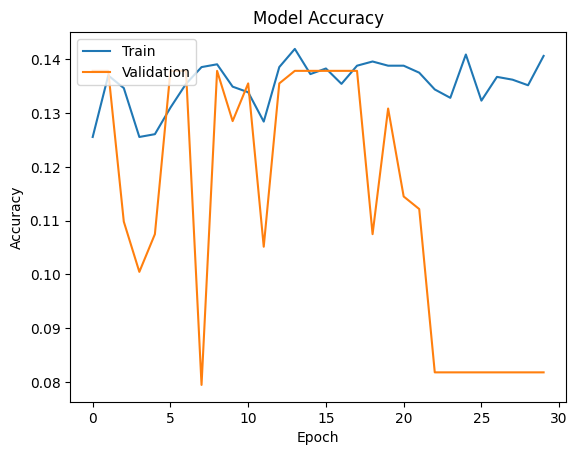

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluate Model 2

In [ ]:
m2_accuracy = model2.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m2_accuracy[1]}")

15/15 - 0s - loss: 17.7670 - accuracy: 0.0821 - 312ms/epoch - 21ms/step
Test Accuracy: 0.08210526406764984


Make Predictions

In [ ]:
y_pred = model2.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 3ms/step


Confustion Matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.08      1.00      0.15        39
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        52
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00        39

    accuracy                           0.08       475
   macro avg       0.01      0.08      0.01       475
weighted avg       0.01      0.08      0.01       475



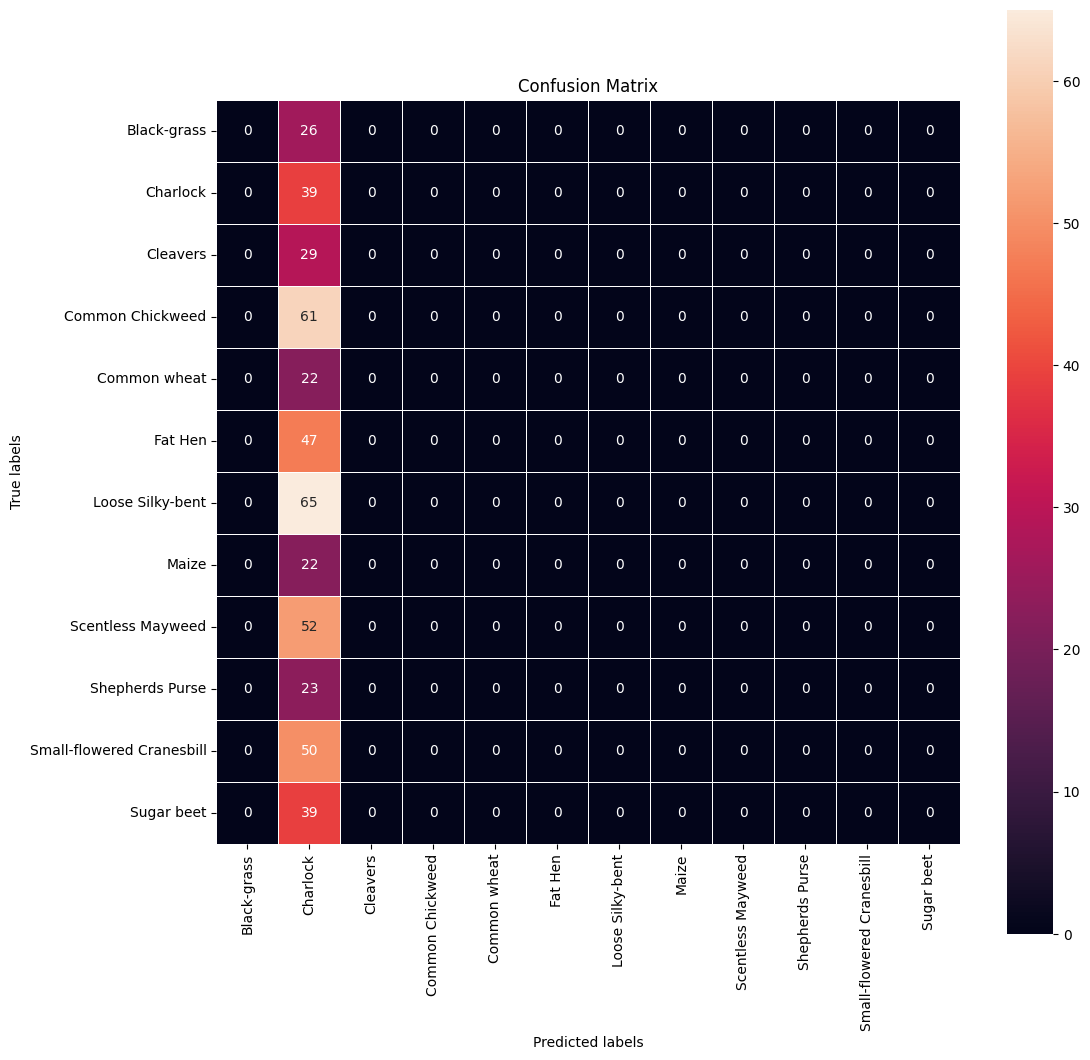

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations:**

Datagenerator made this model emplode and do horribly. I won't be using datagenerator on any of the other models

### Model 2 w/out data generator

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

In [ ]:
# initialize sequential model
model8 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation= 'relu', input_shape= (64,64,3)), # convo 1 w/32 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 2 w/64 3x3 filters
    layers.MaxPooling2D((2,2)), # max 1
    layers.BatchNormalization(), # normalization layer 1
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 3 w/32 3x3 filters
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 4 w/32 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 2
    layers.BatchNormalization(), # normalization layer 2
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 5 w/64 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 6 w/64 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 3
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 7 w/16 3x3 filters
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 8 w/16 3x3 filters
    layers.Flatten(), # flatten to go into ANN
    layers.Dense(64, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(32, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(12, activation= 'softmax') # output layer
    ])

# compile model
model8.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# print model summary
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9

In [ ]:
# Fitting the model with 30 epochs
history=model8.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/30
121/121 - 5s - loss: 2.2088 - accuracy: 0.2425 - val_loss: 2.2807 - val_accuracy: 0.2173 - lr: 0.0010 - 5s/epoch - 41ms/step
Epoch 2/30
121/121 - 1s - loss: 1.7808 - accuracy: 0.3928 - val_loss: 4.8982 - val_accuracy: 0.1379 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 1.4755 - accuracy: 0.4913 - val_loss: 1.8034 - val_accuracy: 0.3832 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 4/30
121/121 - 1s - loss: 1.3311 - accuracy: 0.5519 - val_loss: 1.5772 - val_accuracy: 0.4509 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.1747 - accuracy: 0.6012 - val_loss: 3.6314 - val_accuracy: 0.1893 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.0720 - accuracy: 0.6392 - val_loss: 1.1318 - val_accuracy: 0.6192 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 0.9814 - accuracy: 0.6787 - val_loss: 1.0101 - val_accuracy: 0.6682 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 0.9103 - accuracy: 0.7

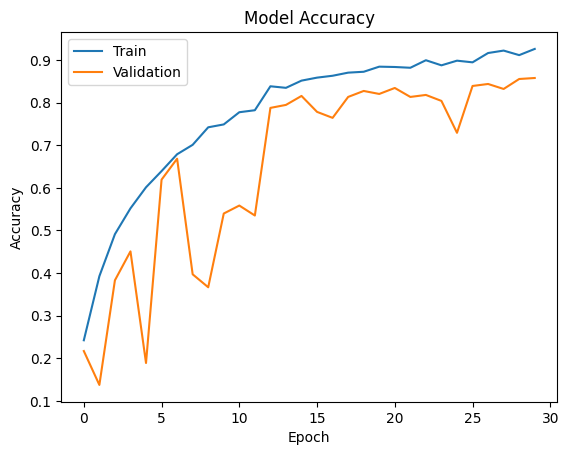

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
m8_accuracy = model8.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m8_accuracy[1]}")

15/15 - 0s - loss: 0.5984 - accuracy: 0.8211 - 76ms/epoch - 5ms/step
Test Accuracy: 0.821052610874176


In [ ]:
y_pred = model8.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.38      0.19      0.26        26
           1       0.88      0.95      0.91        39
           2       0.88      0.76      0.81        29
           3       0.96      0.90      0.93        61
           4       0.78      0.64      0.70        22
           5       0.80      0.85      0.82        47
           6       0.75      0.89      0.82        65
           7       0.77      0.91      0.83        22
           8       0.75      0.85      0.79        52
           9       0.64      0.70      0.67        23
          10       0.96      0.94      0.95        50
          11       0.94      0.82      0.88        39

    accuracy                           0.82       475
   macro avg       0.79      0.78      0.78       475
weighted avg       0.82      0.82      0.81       475



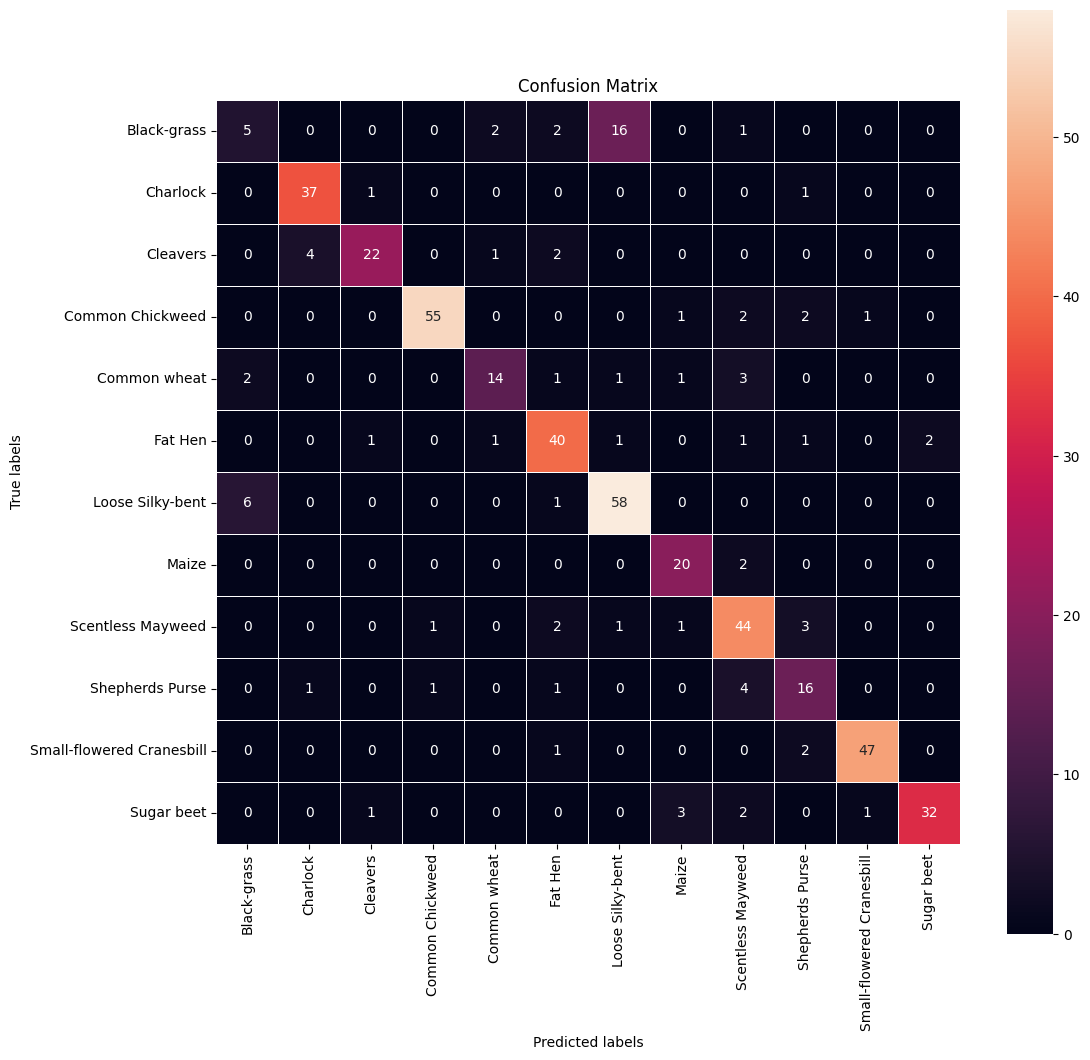

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations**

Model 2 Accuracy: Model 2 is a more complex CNN that scored 82% accuracy. This model also predicted poorly on Black Grass.

### Model 3: VGG16 Model

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Summary of the VGG16 model architecture
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
# we do this because we want the original weights, we don't want to retrain or train over them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


Trying to figure out class weights

In [ ]:
# VGG16 model
model3 = models.Sequential()
model3.add(vgg_model) # VGG16 conv layers
model3.add(layers.Flatten()) # flatten to go into ANN
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(12, activation='softmax'))  # 12 classes

In [ ]:
# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model with 30 epochs
history=model3.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/30
121/121 - 4s - loss: 2.2637 - accuracy: 0.2433 - val_loss: 1.9793 - val_accuracy: 0.3785 - lr: 0.0010 - 4s/epoch - 34ms/step
Epoch 2/30
121/121 - 1s - loss: 1.9014 - accuracy: 0.3520 - val_loss: 1.6901 - val_accuracy: 0.4369 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.7091 - accuracy: 0.4071 - val_loss: 1.5148 - val_accuracy: 0.4696 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.5943 - accuracy: 0.4414 - val_loss: 1.4753 - val_accuracy: 0.4790 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.5243 - accuracy: 0.4481 - val_loss: 1.3707 - val_accuracy: 0.5164 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 6/30
121/121 - 1s - loss: 1.4665 - accuracy: 0.4804 - val_loss: 1.3435 - val_accuracy: 0.5210 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 7/30
121/121 - 1s - loss: 1.4170 - accuracy: 0.4939 - val_loss: 1.3065 - val_accuracy: 0.5327 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 8/30
121/121 - 1s - loss: 1.3682 - accurac

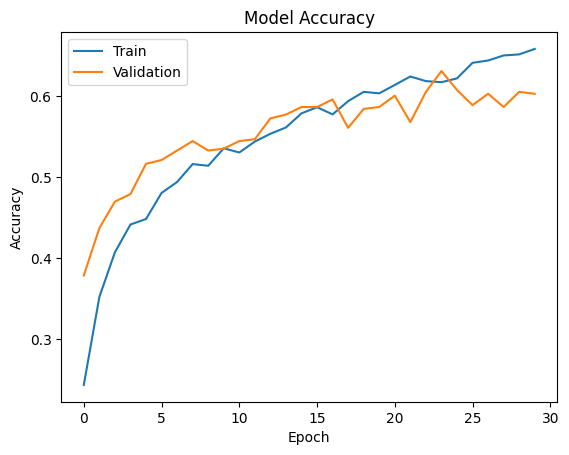

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
m3_accuracy = model3.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m3_accuracy[1]}")

15/15 - 1s - loss: 1.1580 - accuracy: 0.5789 - 703ms/epoch - 47ms/step
Test Accuracy: 0.5789473652839661


In [ ]:
y_pred = model3.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 7ms/step


              precision    recall  f1-score   support

           0       0.71      0.46      0.56        26
           1       0.45      0.38      0.42        39
           2       0.54      0.52      0.53        29
           3       0.71      0.84      0.77        61
           4       0.40      0.18      0.25        22
           5       0.57      0.43      0.49        47
           6       0.64      0.86      0.74        65
           7       0.72      0.59      0.65        22
           8       0.54      0.56      0.55        52
           9       0.33      0.09      0.14        23
          10       0.51      0.70      0.59        50
          11       0.50      0.59      0.54        39

    accuracy                           0.58       475
   macro avg       0.55      0.52      0.52       475
weighted avg       0.57      0.58      0.56       475



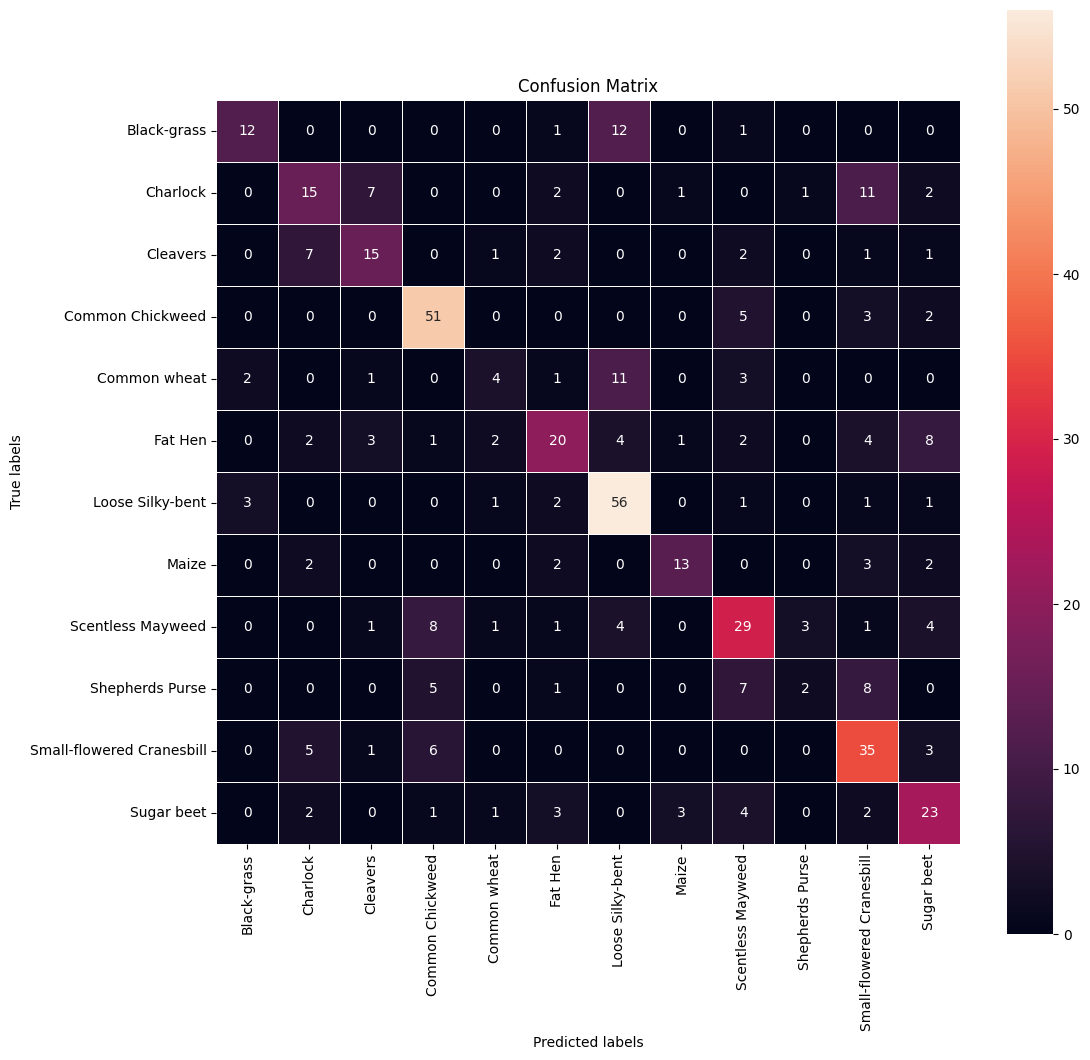

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations**

Model 3: VGG16 Accuracy. This model used the weights from VGG16 with the CNN of model 2 on top. This model only predicted seed classes correctly 58% of the time. It did, however, predict better on Black Grass than the other models.

### Compare masked data performance to unmasked data performance

I'm going to run the 2nd model on images that haven't been masked, so we're going to start over.

In [ ]:
# load images per project FAQ
images = np.load('/content/drive/MyDrive/DSML/UnivTex/Project Folder/Project 5: Plant Seedling Classification/images.npy')

# read in labels dataset
labels = pd.read_csv('/content/drive/MyDrive/DSML/UnivTex/Project Folder/Project 5: Plant Seedling Classification/Labels.csv')

#### Convert images to RGB

In [ ]:
# convert BGR to RGB
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

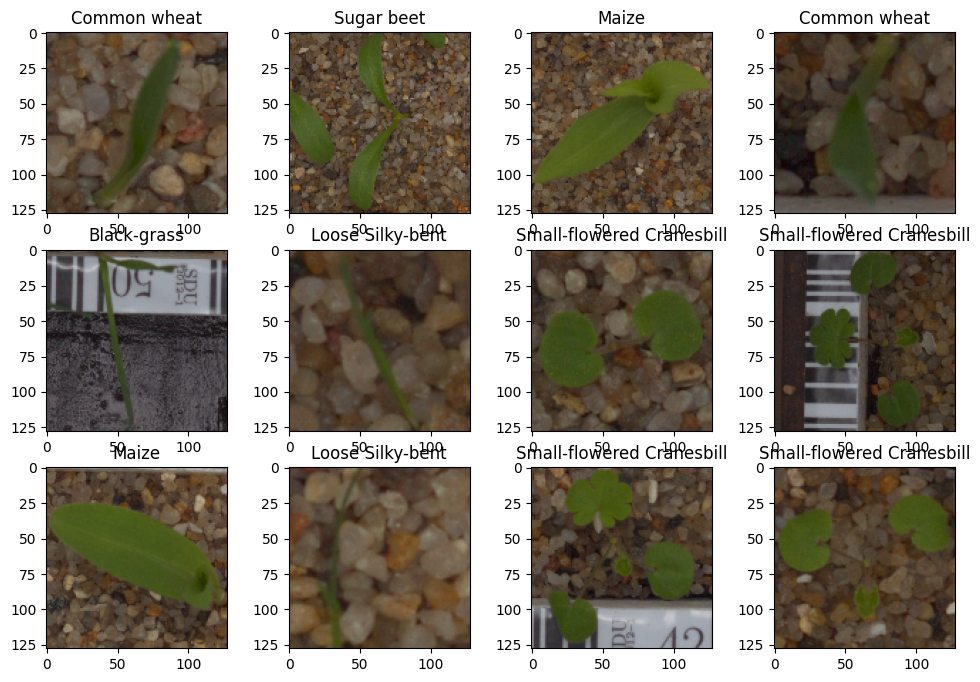

In [ ]:
# let's take a look at a random selection of these with a function
# code taken from the MLS 2 Monkey Species Classification notebook
def plot_images(images, labels): # arguments
  num_classes = 12
  cats = np.unique(labels)
  keys = dict(labels['Label'])
  rows = 3
  cols = 4
  fig = plt.figure(figsize= (12,8))
  for i in range(cols): # loop through columns
    for j in range(rows): # loop throug rows
      random_index = np.random.randint(0, len(labels))
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)
      ax.imshow(images[random_index, :])
      ax.set_title(keys[random_index])
  plt.show()

plot_images(images, labels)

##### Resize Images

In [ ]:
images_decreased = [] # create empty list
height = 64 # define height
width = 64 # define width
dimensions = (width, height)
for i in range(len(images)): # loop through the len of the images
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation= cv2.INTER_LINEAR))

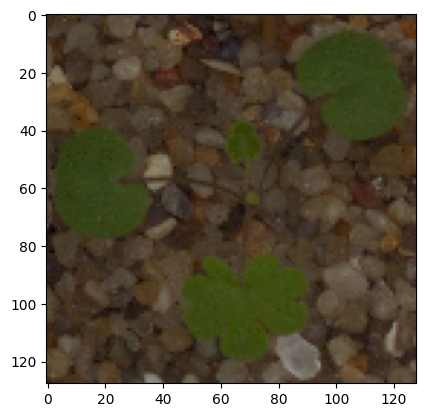

In [ ]:
plt.imshow(images[1])

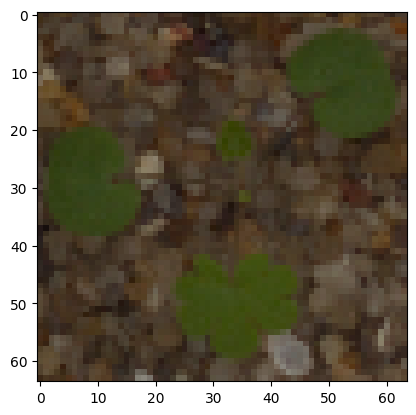

In [ ]:
# show decreased images
plt.imshow(images_decreased[1])

#### Split, encode and normalize

In [ ]:
# split data into train, val, test
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=12,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=12,stratify=y_temp)

In [ ]:
# I initially tried using to_categorical, but got an error with Charlock, so I used this one instead
lb = LabelBinarizer()
y_train_le = lb.fit_transform(y_train) # fit_transform train data
y_val_le= lb.transform(y_val) # transform validation data
y_test_le= lb.transform(y_test) # transform test data

In [ ]:
# normalize the X features
X_train_norm = X_train.astype('float32') / 255.0
X_val_norm = X_val.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

### Run model 4+ on unmasked images to compare model performance

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

In [ ]:
# initialize sequential model
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation= 'relu', input_shape= (64,64,3)), # convo w/32 3x3 filters
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo w/64 3x3 filters
    layers.MaxPooling2D ((2, 2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo w/64 3x3 filters
    layers.Flatten(), # flatten to go into ANN
    layers.Dense(64, activation= 'relu'), # dense input layer
    layers.Dense(12, activation= 'softmax')
    ])

# compile model
model4.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# print model summary
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
# Fitting the model with 30 epochs and validation_split as 10%
history=model4.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/30
121/121 - 2s - loss: 2.1115 - accuracy: 0.3013 - val_loss: 1.8197 - val_accuracy: 0.3949 - lr: 0.0010 - 2s/epoch - 18ms/step
Epoch 2/30
121/121 - 1s - loss: 1.5717 - accuracy: 0.4539 - val_loss: 1.3704 - val_accuracy: 0.4930 - lr: 0.0010 - 522ms/epoch - 4ms/step
Epoch 3/30
121/121 - 1s - loss: 1.3160 - accuracy: 0.5443 - val_loss: 1.1691 - val_accuracy: 0.6075 - lr: 0.0010 - 504ms/epoch - 4ms/step
Epoch 4/30
121/121 - 1s - loss: 1.0718 - accuracy: 0.6350 - val_loss: 1.0103 - val_accuracy: 0.6332 - lr: 0.0010 - 501ms/epoch - 4ms/step
Epoch 5/30
121/121 - 0s - loss: 0.8736 - accuracy: 0.7070 - val_loss: 0.8198 - val_accuracy: 0.6986 - lr: 0.0010 - 494ms/epoch - 4ms/step
Epoch 6/30
121/121 - 1s - loss: 0.7380 - accuracy: 0.7583 - val_loss: 0.7583 - val_accuracy: 0.7150 - lr: 0.0010 - 519ms/epoch - 4ms/step
Epoch 7/30
121/121 - 1s - loss: 0.6599 - accuracy: 0.7790 - val_loss: 0.7292 - val_accuracy: 0.7430 - lr: 0.0010 - 504ms/epoch - 4ms/step
Epoch 8/30
121/121 - 1s - loss: 0.59

#### Plot Model Accuracy

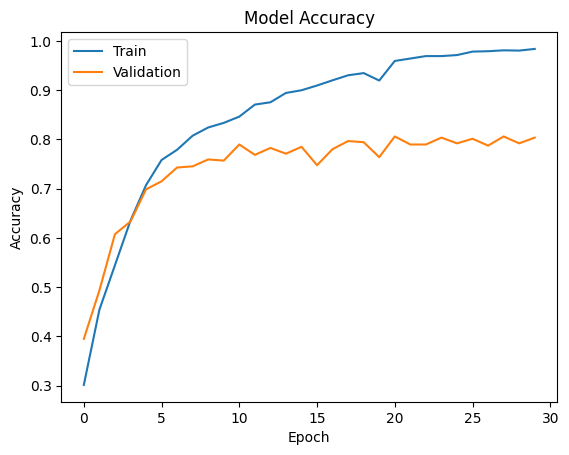

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
m4_accuracy = model4.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m4_accuracy[1]}")

15/15 - 0s - loss: 1.4200 - accuracy: 0.7811 - 58ms/epoch - 4ms/step
Test Accuracy: 0.7810526490211487


##### Make Predictions

In [ ]:
y_pred = model4.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 2ms/step


#### Confusion Matrix

              precision    recall  f1-score   support

           0       0.42      0.31      0.36        26
           1       0.89      0.87      0.88        39
           2       0.88      0.79      0.84        29
           3       0.79      0.97      0.87        61
           4       0.62      0.36      0.46        22
           5       0.78      0.77      0.77        47
           6       0.72      0.91      0.80        65
           7       0.80      0.73      0.76        22
           8       0.82      0.69      0.75        52
           9       0.83      0.65      0.73        23
          10       0.84      0.94      0.89        50
          11       0.79      0.77      0.78        39

    accuracy                           0.78       475
   macro avg       0.77      0.73      0.74       475
weighted avg       0.78      0.78      0.77       475



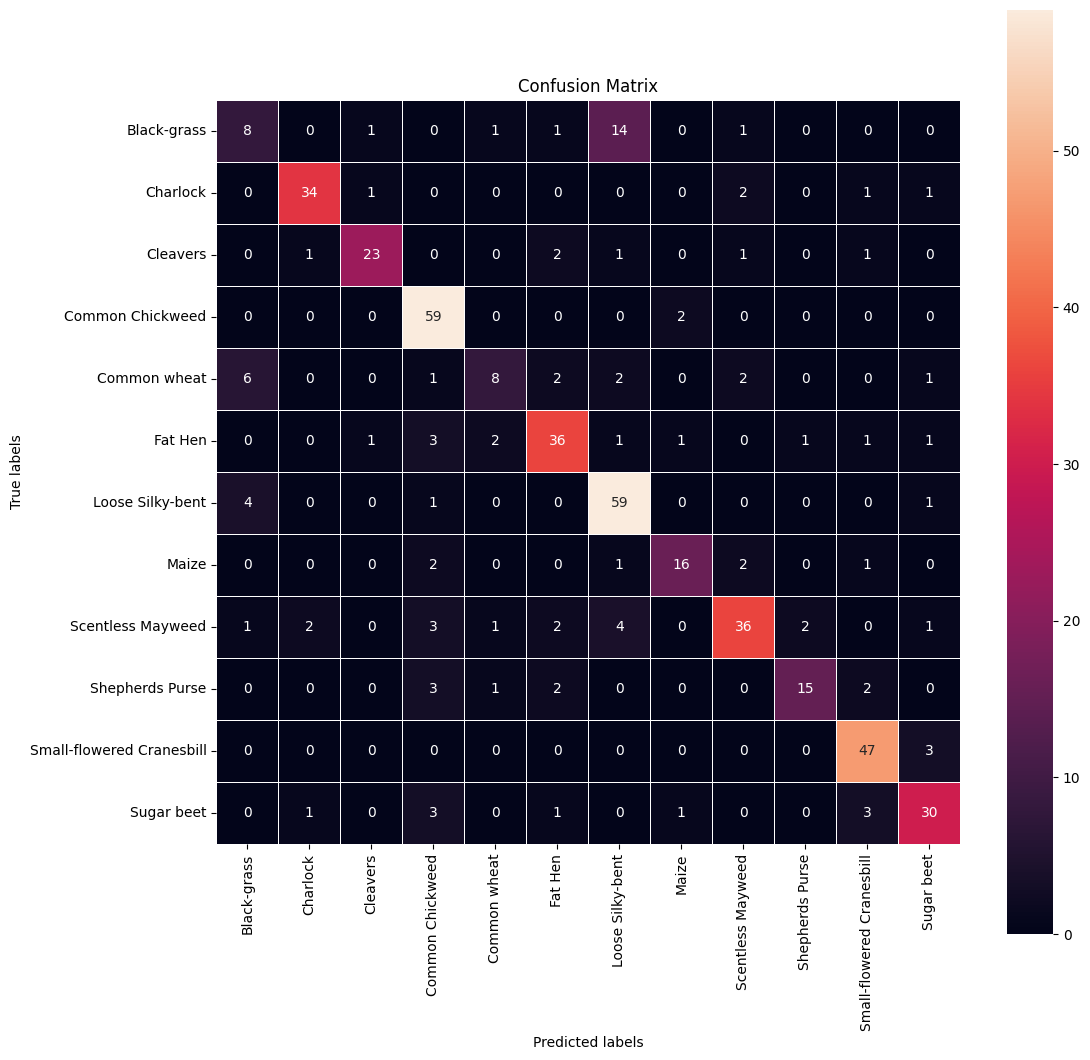

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations**

Model 4 Accuracy: This was a simple model used on unmasked images to try to improve model accuracy from the masked data. This model achieved 78% accuracy and struggle to accurately predict Black Grass as the other models had.

In [ ]:
# prompt: Reducing the Learning Rate:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=5,
                              min_lr=0.0001)

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

### Model 5

In [ ]:
# initialize sequential model
model5 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation= 'relu', input_shape= (64,64,3)), # convo 1 w/32 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 2 w/64 3x3 filters
    layers.MaxPooling2D((2,2)), # max 1
    layers.BatchNormalization(), # normalization layer 1
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 3 w/32 3x3 filters
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 4 w/32 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 2
    layers.BatchNormalization(), # normalization layer 2
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 5 w/64 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 6 w/64 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 3
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 7 w/16 3x3 filters
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 8 w/16 3x3 filters
    layers.Flatten(), # flatten to go into ANN
    layers.Dense(64, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(32, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(12, activation= 'softmax') # output layer
    ])

In [ ]:
# compile model
model5.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# print model summary
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9

In [ ]:
# Fitting the model with 30 epochs and validation_split as 10%
history=model5.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/30
121/121 - 5s - loss: 2.2535 - accuracy: 0.2274 - val_loss: 2.4266 - val_accuracy: 0.1495 - lr: 0.0010 - 5s/epoch - 42ms/step
Epoch 2/30
121/121 - 1s - loss: 1.7902 - accuracy: 0.3865 - val_loss: 4.8596 - val_accuracy: 0.1379 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.5235 - accuracy: 0.4684 - val_loss: 2.4062 - val_accuracy: 0.2383 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.3656 - accuracy: 0.5357 - val_loss: 1.4605 - val_accuracy: 0.4930 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.2152 - accuracy: 0.5984 - val_loss: 0.9921 - val_accuracy: 0.6916 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.0635 - accuracy: 0.6514 - val_loss: 1.7806 - val_accuracy: 0.4509 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.0026 - accuracy: 0.6660 - val_loss: 0.9520 - val_accuracy: 0.6799 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 0.9581 - accuracy: 0

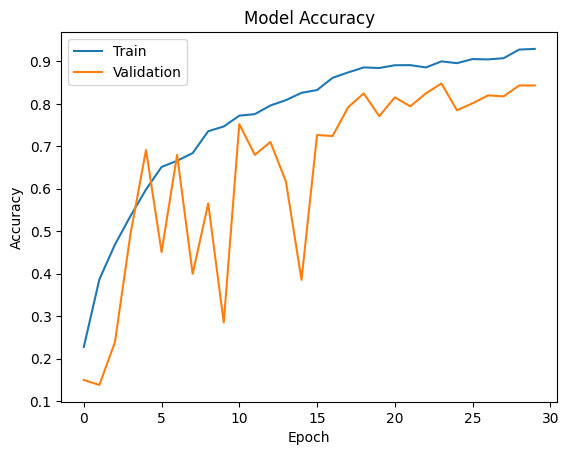

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Make predictions

In [ ]:
m5_accuracy = model5.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m5_accuracy[1]}")

15/15 - 0s - loss: 0.5740 - accuracy: 0.8547 - 77ms/epoch - 5ms/step
Test Accuracy: 0.854736864566803


In [ ]:
y_pred = model5.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.62      0.19      0.29        26
           1       0.97      0.95      0.96        39
           2       0.89      0.86      0.88        29
           3       0.91      0.98      0.94        61
           4       0.94      0.77      0.85        22
           5       0.85      0.87      0.86        47
           6       0.74      0.94      0.83        65
           7       0.91      0.95      0.93        22
           8       0.79      0.87      0.83        52
           9       0.80      0.70      0.74        23
          10       0.96      0.90      0.93        50
          11       0.82      0.85      0.84        39

    accuracy                           0.85       475
   macro avg       0.85      0.82      0.82       475
weighted avg       0.85      0.85      0.84       475



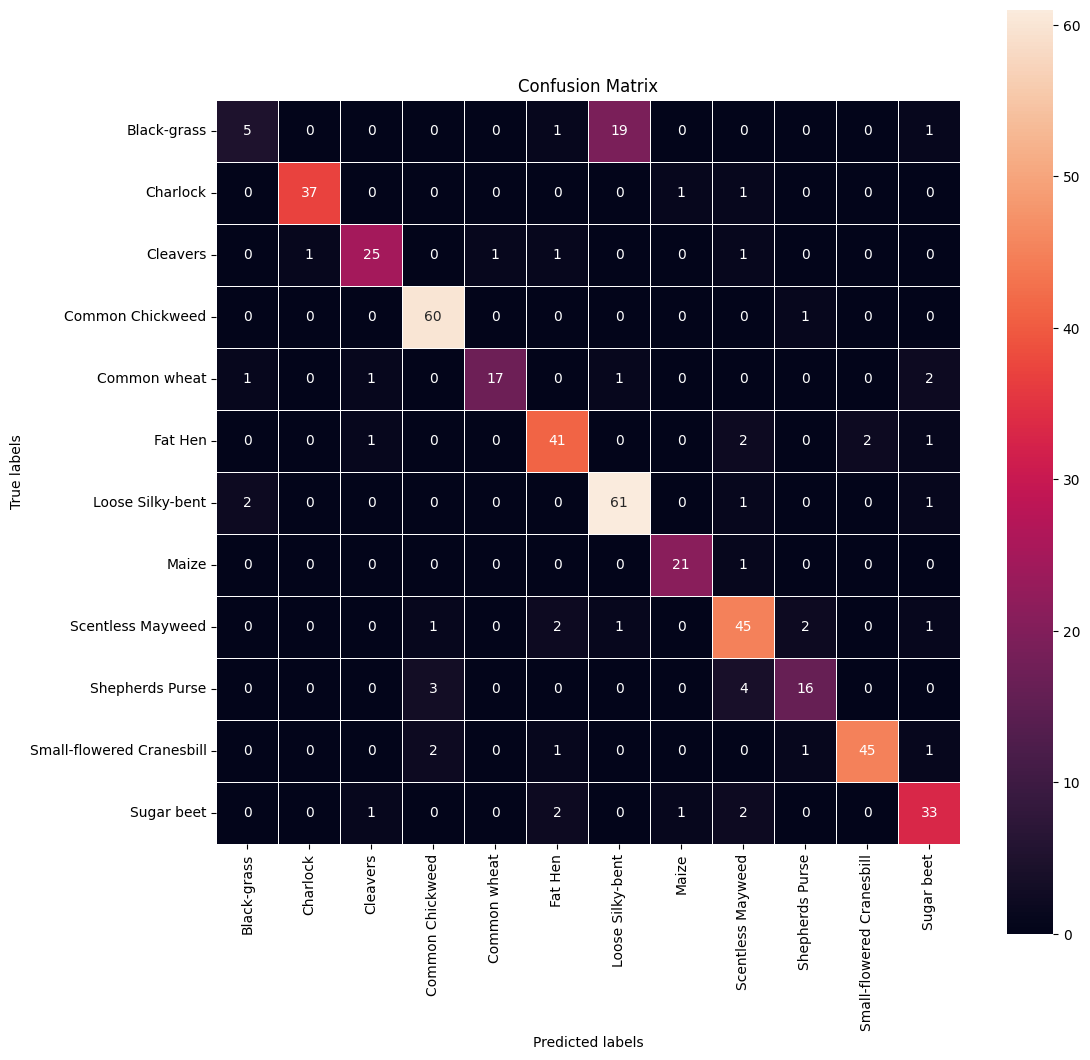

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations**

Model 5 Accuracy: This model is a more complex CNN model trained on unmasked data to compare performance accuracy. It achieved 85% accuracy, but struggled to predict Black Grass more than the other models

### Model 6: VGG16

In [ ]:
# clear backend
backend.clear_session()

# set seed
np.random.seed(12)
random.seed(12)
tf.random.set_seed(12)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Load the pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Summary of the VGG16 model architecture
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
# we do this because we want the original weights, we don't want to retrain or train over them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# VGG16 model
model6 = models.Sequential()
model6.add(vgg_model) # VGG16 conv layers
model6.add(layers.Flatten()) # flatten to go into ANN
model6.add(layers.Dense(32, activation='relu'))
model6.add(layers.Dropout(0.25))
model6.add(layers.Dense(32, activation='relu'))
model6.add(layers.Dense(12, activation='softmax'))  # 12 classes

In [ ]:
# Compile the model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model with 30 epochs
history=model6.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/30
121/121 - 3s - loss: 2.2707 - accuracy: 0.2311 - val_loss: 1.9866 - val_accuracy: 0.3528 - lr: 0.0010 - 3s/epoch - 23ms/step
Epoch 2/30
121/121 - 1s - loss: 1.9318 - accuracy: 0.3319 - val_loss: 1.7133 - val_accuracy: 0.4089 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.7503 - accuracy: 0.3845 - val_loss: 1.5692 - val_accuracy: 0.4322 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.6477 - accuracy: 0.4159 - val_loss: 1.5034 - val_accuracy: 0.4673 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.5716 - accuracy: 0.4377 - val_loss: 1.4137 - val_accuracy: 0.5210 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 6/30
121/121 - 1s - loss: 1.5058 - accuracy: 0.4671 - val_loss: 1.3516 - val_accuracy: 0.5023 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 7/30
121/121 - 1s - loss: 1.4517 - accuracy: 0.4801 - val_loss: 1.3252 - val_accuracy: 0.5327 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 8/30
121/121 - 1s - loss: 1.3948 - accurac

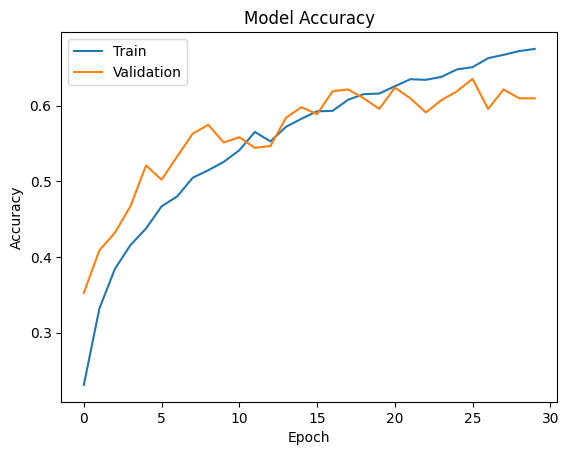

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
m6_accuracy = model6.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m6_accuracy[1]}")

15/15 - 0s - loss: 1.0540 - accuracy: 0.6295 - 140ms/epoch - 9ms/step
Test Accuracy: 0.6294736862182617


In [ ]:
y_pred = model6.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 7ms/step


              precision    recall  f1-score   support

           0       0.53      0.38      0.44        26
           1       0.58      0.46      0.51        39
           2       0.60      0.52      0.56        29
           3       0.74      0.84      0.78        61
           4       0.50      0.27      0.35        22
           5       0.58      0.53      0.56        47
           6       0.70      0.80      0.75        65
           7       0.88      0.64      0.74        22
           8       0.57      0.83      0.68        52
           9       0.29      0.09      0.13        23
          10       0.60      0.80      0.68        50
          11       0.62      0.59      0.61        39

    accuracy                           0.63       475
   macro avg       0.60      0.56      0.57       475
weighted avg       0.62      0.63      0.61       475



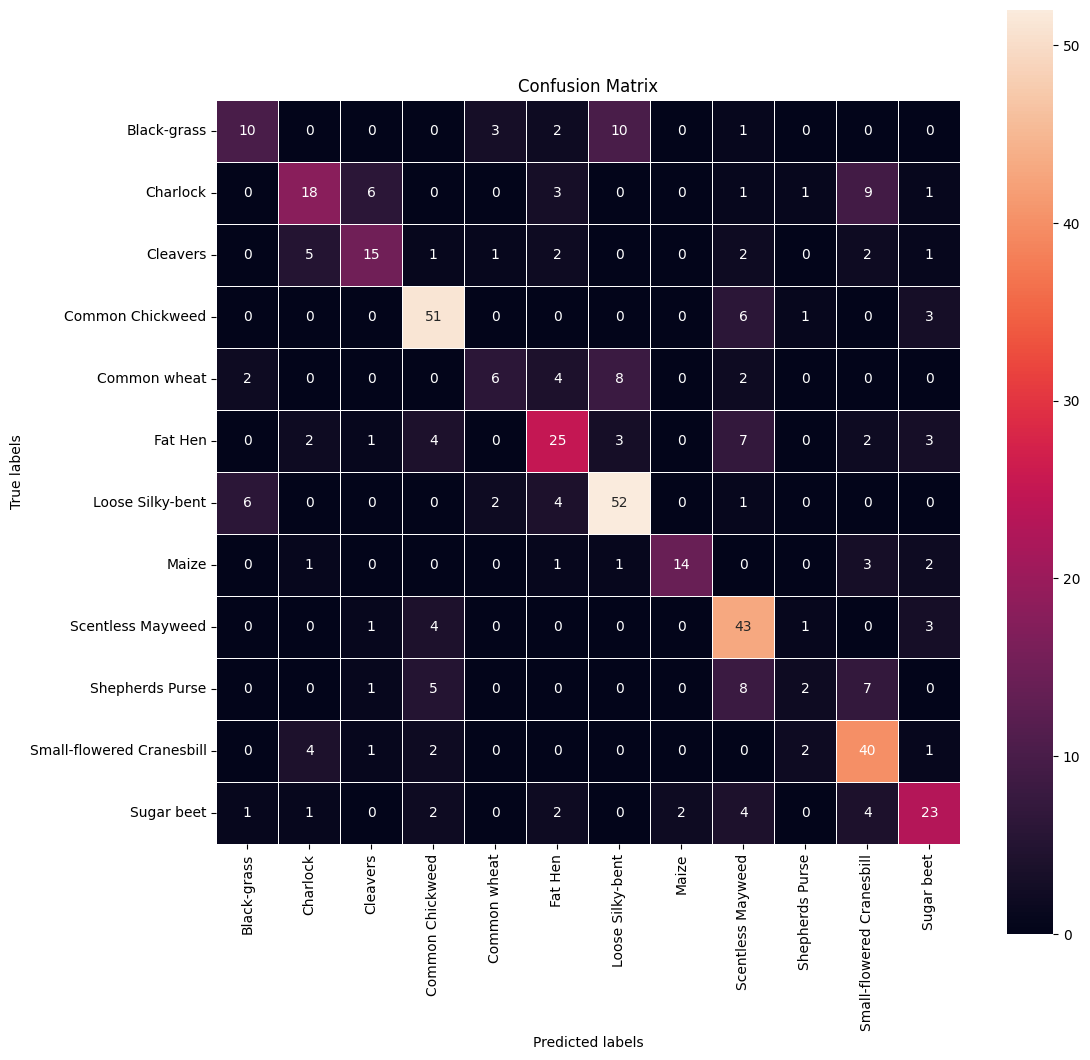

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations**

Model 6: VGG16 Accuracy. This model was trained on the VGG16 weights and custom CNN layers. It predicted Black Grass better, but only achieved 63% accuracy

### Model 7: VGG19

In [ ]:
from keras.applications import VGG19
# Load the pre-trained VGG19 model (excluding the top layers)
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the pre-trained layers so they are not trainable
for layer in vgg19.layers:
    layer.trainable = False

# VGG16 model
model7 = models.Sequential()
model7.add(vgg19) # VGG19 conv layers
model7.add(layers.Flatten()) # flatten to go into ANN
model7.add(layers.Dense(32, activation='relu'))
model7.add(layers.Dropout(0.25))
model7.add(layers.Dense(32, activation='relu'))
model7.add(layers.Dense(12, activation='softmax'))  # 12 classes

# Compile the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Fitting the model with 30 epochs
history=model7.fit(X_train_norm,
                   y_train_le,
                   epochs= 50,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/50
121/121 - 3s - loss: 2.3288 - accuracy: 0.1859 - val_loss: 2.1199 - val_accuracy: 0.3201 - lr: 0.0010 - 3s/epoch - 25ms/step
Epoch 2/50
121/121 - 1s - loss: 2.0016 - accuracy: 0.3086 - val_loss: 1.7780 - val_accuracy: 0.3668 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 3/50
121/121 - 1s - loss: 1.7990 - accuracy: 0.3551 - val_loss: 1.6414 - val_accuracy: 0.4206 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 4/50
121/121 - 1s - loss: 1.7053 - accuracy: 0.3798 - val_loss: 1.5628 - val_accuracy: 0.4439 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 5/50
121/121 - 1s - loss: 1.6183 - accuracy: 0.4123 - val_loss: 1.4649 - val_accuracy: 0.4766 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 6/50
121/121 - 1s - loss: 1.5464 - accuracy: 0.4435 - val_loss: 1.4217 - val_accuracy: 0.5047 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 7/50
121/121 - 1s - loss: 1.5192 - accuracy: 0.4479 - val_loss: 1.3876 - val_accuracy: 0.5164 - lr: 0.0010 - 1s/epoch - 12ms/step
Epoch 8/50
121/121 - 1s - loss: 1.4706 - accurac

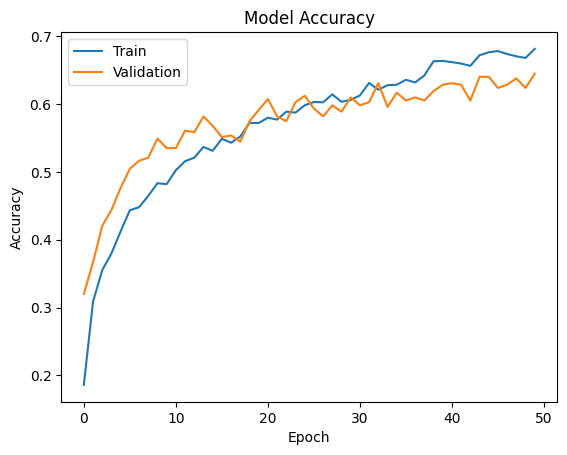

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
m7_accuracy = model7.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m7_accuracy[1]}")

15/15 - 0s - loss: 1.1345 - accuracy: 0.6484 - 166ms/epoch - 11ms/step
Test Accuracy: 0.648421049118042


In [ ]:
y_pred = model7.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 9ms/step


              precision    recall  f1-score   support

           0       0.41      0.27      0.33        26
           1       0.63      0.56      0.59        39
           2       0.63      0.76      0.69        29
           3       0.72      0.90      0.80        61
           4       0.53      0.36      0.43        22
           5       0.50      0.43      0.46        47
           6       0.68      0.85      0.75        65
           7       0.81      0.77      0.79        22
           8       0.65      0.65      0.65        52
           9       0.70      0.30      0.42        23
          10       0.74      0.78      0.76        50
          11       0.55      0.56      0.56        39

    accuracy                           0.65       475
   macro avg       0.63      0.60      0.60       475
weighted avg       0.64      0.65      0.63       475



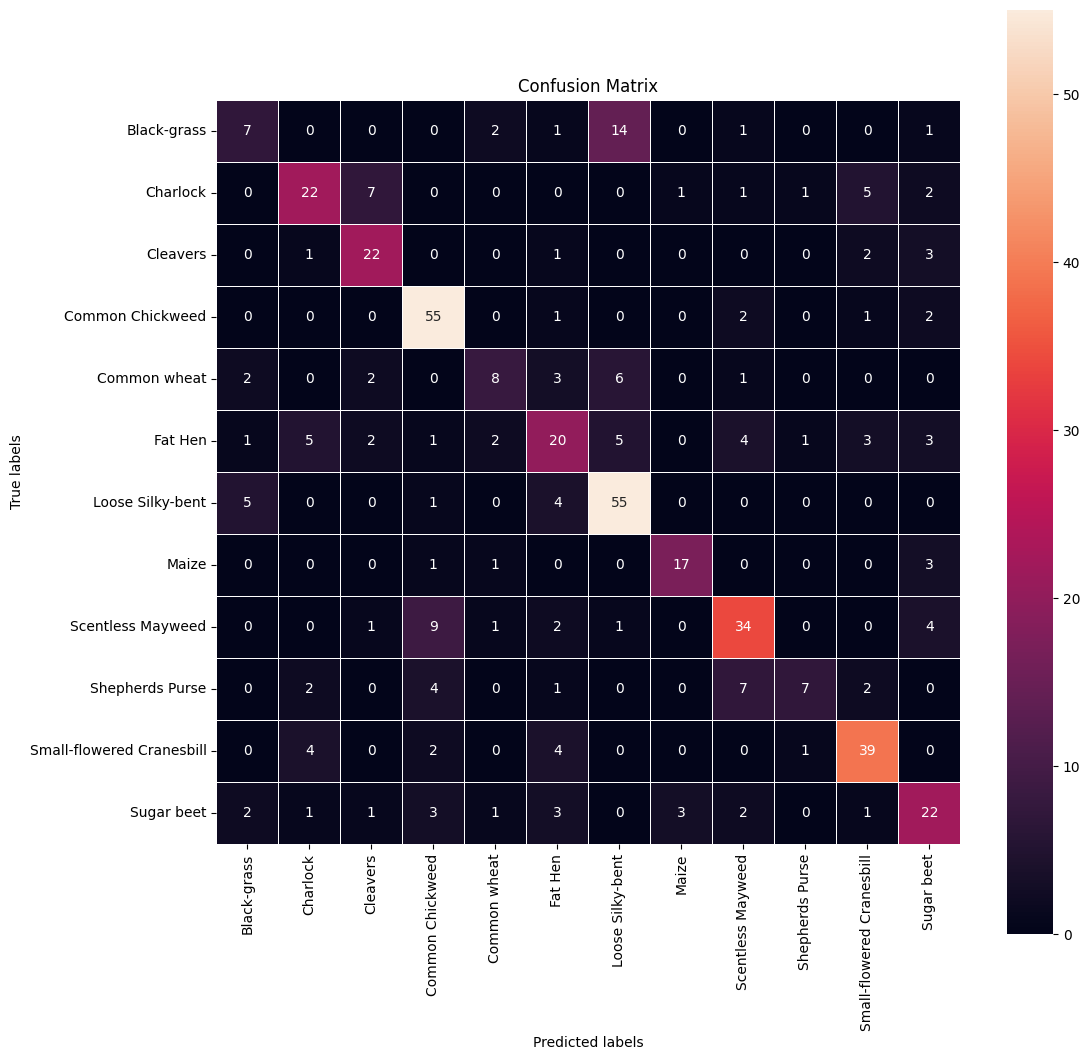

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Observations**

Model 7: VGG19 Accuracy. This model did slightly better than the VGG16 model did, achieving 64% accuracy.

## Final Model

### Model 5

In [ ]:
# initialize sequential model
model5 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation= 'relu', input_shape= (64,64,3)), # convo 1 w/32 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 2 w/64 3x3 filters
    layers.MaxPooling2D((2,2)), # max 1
    layers.BatchNormalization(), # normalization layer 1
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 3 w/32 3x3 filters
    layers.Conv2D(32, (3, 3), activation= 'relu'), # convo 4 w/32 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 2
    layers.BatchNormalization(), # normalization layer 2
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 5 w/64 3x3 filters
    layers.Conv2D(64, (3, 3), activation= 'relu'), # convo 6 w/64 3x3 filters
    layers.MaxPooling2D ((2, 2)), # max 3
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 7 w/16 3x3 filters
    layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'), # convo 8 w/16 3x3 filters
    layers.Flatten(), # flatten to go into ANN
    layers.Dense(64, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(32, activation= 'relu'), # dense input layer
    layers.Dropout(0.25), # dropout layer
    layers.Dense(12, activation= 'softmax') # output layer
    ])

In [ ]:
# compile model
model5.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# print model summary
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9

In [ ]:
# Fitting the model with 30 epochs and validation_split as 10%
history=model5.fit(X_train_norm,
                   y_train_le,
                   epochs= 30,
                   validation_data= (X_val_norm, y_val_le),
                   batch_size= 32,
                   callbacks = [reduce_lr],
                   verbose= 2)

Epoch 1/30
121/121 - 5s - loss: 2.2535 - accuracy: 0.2274 - val_loss: 2.4266 - val_accuracy: 0.1495 - lr: 0.0010 - 5s/epoch - 42ms/step
Epoch 2/30
121/121 - 1s - loss: 1.7902 - accuracy: 0.3865 - val_loss: 4.8596 - val_accuracy: 0.1379 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.5235 - accuracy: 0.4684 - val_loss: 2.4062 - val_accuracy: 0.2383 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.3656 - accuracy: 0.5357 - val_loss: 1.4605 - val_accuracy: 0.4930 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 5/30
121/121 - 1s - loss: 1.2152 - accuracy: 0.5984 - val_loss: 0.9921 - val_accuracy: 0.6916 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 6/30
121/121 - 1s - loss: 1.0635 - accuracy: 0.6514 - val_loss: 1.7806 - val_accuracy: 0.4509 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 1.0026 - accuracy: 0.6660 - val_loss: 0.9520 - val_accuracy: 0.6799 - lr: 0.0010 - 1s/epoch - 9ms/step
Epoch 8/30
121/121 - 1s - loss: 0.9581 - accuracy: 0

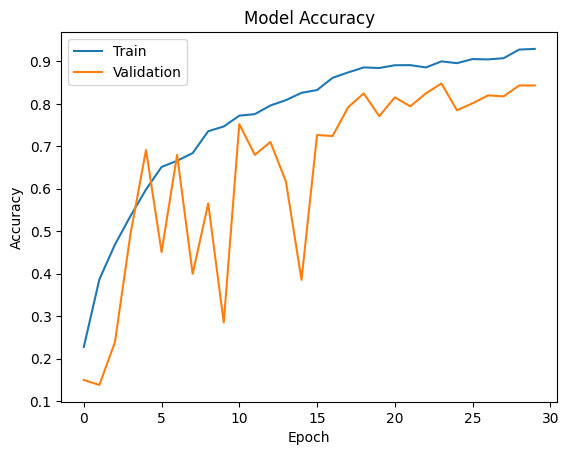

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Make predictions

In [ ]:
m5_accuracy = model5.evaluate(X_test_norm, y_test_le, verbose=2)
print(f"Test Accuracy: {m5_accuracy[1]}")

15/15 - 0s - loss: 0.5740 - accuracy: 0.8547 - 77ms/epoch - 5ms/step
Test Accuracy: 0.854736864566803


In [ ]:
y_pred = model5.predict(X_test_norm)
y_pred_arg = np.argmax(y_pred, axis= 1)
y_test_arg = np.argmax(y_test_le, axis= 1)

15/15 [==============================] - 0s 3ms/step


### Visualizing the prediction

              precision    recall  f1-score   support

           0       0.62      0.19      0.29        26
           1       0.97      0.95      0.96        39
           2       0.89      0.86      0.88        29
           3       0.91      0.98      0.94        61
           4       0.94      0.77      0.85        22
           5       0.85      0.87      0.86        47
           6       0.74      0.94      0.83        65
           7       0.91      0.95      0.93        22
           8       0.79      0.87      0.83        52
           9       0.80      0.70      0.74        23
          10       0.96      0.90      0.93        50
          11       0.82      0.85      0.84        39

    accuracy                           0.85       475
   macro avg       0.85      0.82      0.82       475
weighted avg       0.85      0.85      0.84       475



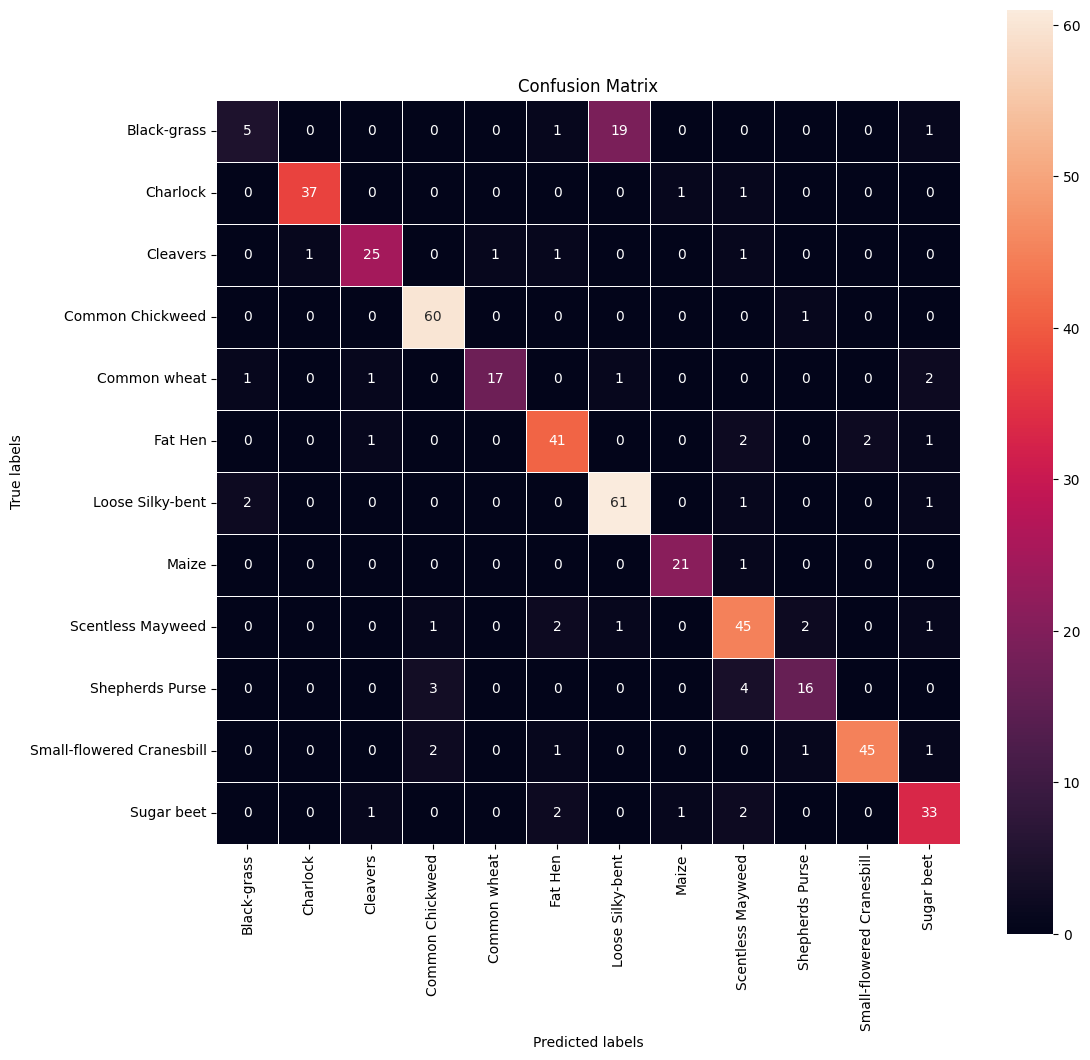

In [ ]:
# Print the classification report
print(classification_report(y_test_arg, y_pred_arg))


# plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_), rotation= 90)
ax.yaxis.set_ticklabels(list(lb.classes_), rotation= 0)
plt.show()

**Final Model Details**

Model Accuracy: 85%

- Convolutional layers: 6
- MaxPooling Layers: 3
- BatchNormalization Layers: 2
- ANN Layers: 3
- Total params: 152716
    - Trainable params: 152524
    - Non-trainable params: 192


## Actionable Insights and Business Recommendations

**Observations:**

Every model I trained struggled to correctly identify Black Grass. Further, there was more inconsistency than I would have liked, even after back clearing.

**Business Insights**

This model does a good with overall prediction. I would recommend continued model exploration before this model is put into production. I would even suggest converting the images to grey scale to see if that produces better results. It would also be beneficial to do an exhaustive exploration of other transfer modeling options.